
# Sub-Intensity plots 

In [1]:
from __future__ import annotations

import graphviz
import numpy as np
import qrules
import sympy as sp
from ampform.io import aslatex
from IPython.display import Latex
from qrules.particle import Particle, ParticleCollection

# Collect dynamics symbols

| Resonance | $m$ [MeV] | $\Gamma$ [MeV] | $J^P$ |
|-----------|-----------|----------------|-------|
| $N^*(1440)$ | 1398      | 167            | $\frac{1}{2}^{+}$ |
| $N^*(1535)$ | 1530      | 210            | $\frac{1}{2}^{-}$ |
| $N^*(1650)$ | 1668      | 194            | $\frac{1}{2}^{-}$ |
| $N^*(1710)$ | 1749      | 263            | $\frac{1}{2}^{+}$ |
| $N^*(1880)$ | 1876      | 261            | $\frac{1}{2}^{+}$ |
| $N^*(1895)$ | 2045      | 240            | $\frac{1}{2}^{-}$ |
| $N^*(1900)$ | 1970      | 255            | $\frac{3}{2}^{+}$ |

In [2]:
def load_particle_database() -> ParticleCollection:
    particle_database = qrules.load_default_particles()
    additional_definitions = qrules.io.load(
        "../../../additional-nstar-sigma-definitions.yml"
    )
    particle_database.update(additional_definitions)
    return particle_database


PARTICLE_DB = load_particle_database()

Propagating quantum numbers:   0%|          | 0/36 [00:00<?, ?it/s]

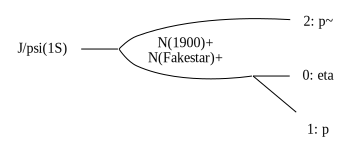

In [3]:
reaction = qrules.generate_transitions(
    initial_state="J/psi(1S)",
    final_state=["eta", "p", "p~"],
    allowed_intermediate_particles=["N(Fakestar)+", "N(1900)+"],
    allowed_interaction_types=["strong"],
    formalism="helicity",
    # mass_conservation_factor=5.0,
    particle_db=PARTICLE_DB,
)
dot = qrules.io.asdot(reaction, collapse_graphs=True)
graphviz.Source(dot)

In [4]:
from kmatrix import COLLECTED_X_SYMBOLS, create_dynamics_symbol

In [5]:
import ampform

model_builder = ampform.get_builder(reaction)
model_builder.adapter.permutate_registered_topologies()
model_builder.scalar_initial_state_mass = True
model_builder.stable_final_state_ids = [0, 1, 2]
for name in reaction.get_intermediate_particles().names:
    model_builder.set_dynamics(name, create_dynamics_symbol)
model = model_builder.formulate()
model.intensity.cleanup()

PoolSum(Abs(A^01[m_A, 0, m1, m2])**2, (m_A, (0, 1, -1)), (m1, (-1/2, 1/2)), (m2, (-1/2, 1/2)))

In [6]:
amp, *_ = model.amplitudes.values()
amp

-C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}*X_{Q=+1, S=3/2, P =1}*WignerD(1, 0, 0, -phi_01, theta_01, 0)*WignerD(3/2, -1/2, 1/2, -phi_0^01, theta_0^01, 0) - C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{-1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}*X_{Q=+1, S=3/2, P =1}*WignerD(1, 0, 1, -phi_01, theta_01, 0)*WignerD(3/2, 1/2, 1/2, -phi_0^01, theta_0^01, 0) - C_{J/\psi(1S) \to N(1900)^+_{+3/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}*X_{Q=+1, S=3/2, P =1}*WignerD(1, 0, -1, -phi_01, theta_01, 0)*WignerD(3/2, -3/2, 1/2, -phi_0^01, theta_0^01, 0) - C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}*X_{Q=+1, S=3/2, P =1}*WignerD(1, 0, 0, -phi_01, theta_01, 0)*WignerD(3/2, -1/2, 1/2, -phi_0^01, theta_0^01, 0) - C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{-1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}*X_{Q=+1, S=3/2, P =1}*WignerD(1, 0, 1, -phi_01, theta_01, 0)*WignerD(3/2, 1/2, 1/2, -p

In [7]:
selected_amplitudes = {
    k: v for i, (k, v) in enumerate(model.amplitudes.items()) if i < 3
}
src = aslatex(selected_amplitudes)

## Formulate dynamics expression

In [8]:
for symbol, resonances in COLLECTED_X_SYMBOLS.items():
    display(symbol)
    for p, _ in resonances:
        print(f"  {p.name:<20s} {p.mass:>8g} GeV  {p.width:>8g} GeV ")
model.parameter_defaults

X_{Q=+1, S=3/2, P =1}

  N(Fakestar)+             1.82 GeV       0.6 GeV 
  N(1900)+                 1.92 GeV       0.2 GeV 


ParameterValues({
  C_{J/\psi(1S) \to N(Fakestar)^+_{+3/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{-1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+3/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{-1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  m_0: 0.547862,
  m_1: 0.93827208816,
  m_2: 0.93827208816,
  m_012: 3.0969,
  })

## Formulate Dynamics

### Phasespace factor

In [9]:
from ampform.kinematics.phasespace import Kallen
from ampform.sympy import unevaluated
from sympy import Abs


@unevaluated(real=False)
class PhaseSpaceCM(sp.Expr):
    s: Any
    m1: Any
    m2: Any
    _latex_repr_ = R"\rho^\mathrm{{CM}}_{{{m1},{m2}}}\left({s}\right)"

    def evaluate(self) -> sp.Expr:
        s, m1, m2 = self.args
        return -16 * sp.pi * sp.I * ChewMandelstam(s, m1, m2)


@unevaluated(real=False)
class ChewMandelstam(sp.Expr):
    s: Any
    m1: Any
    m2: Any
    _latex_repr_ = R"\Sigma\left({s}\right)"

    def evaluate(self) -> sp.Expr:
        s, m1, m2 = self.args
        q = BreakupMomentum(s, m1, m2)
        return (
            1
            / (16 * sp.pi**2)
            * (
                (2 * q / sp.sqrt(s))
                * sp.log(Abs((m1**2 + m2**2 - s + 2 * sp.sqrt(s) * q) / (2 * m1 * m2)))
                - (m1**2 - m2**2) * (1 / s - 1 / (m1 + m2) ** 2) * sp.log(m1 / m2)
            )
        )


@unevaluated(real=False)
class BreakupMomentum(sp.Expr):
    s: Any
    m1: Any
    m2: Any
    _latex_repr_ = R"q\left({s}\right)"

    def evaluate(self) -> sp.Expr:
        s, m1, m2 = self.args
        return sp.sqrt(Kallen(s, m1**2, m2**2)) / (2 * sp.sqrt(s))


@unevaluated(real=False)
class EnergyDecaywidth(sp.Expr):
    s: Any
    m1: Any
    m2: Any
    gamma_R: Any
    _latex_repr_ = R"\Gamma_s\left({s}\right)"

    def evaluate(self) -> sp.Expr:
        s, m1, m2, gamma_R = self.args
        return gamma_R * PhaseSpaceCM(s, m1, m2)

### Relativistic Breit-Wigner

In [10]:
from ampform.dynamics.builder import TwoBodyKinematicVariableSet

PARAMETERS_BW = {}


def formulate_rel_bw(
    resonances: list[tuple[Particle, TwoBodyKinematicVariableSet]],
) -> sp.Expr:
    (p1, variables), *_ = resonances
    s = variables.incoming_state_mass**2
    m_a = variables.outgoing_state_mass1
    m_b = variables.outgoing_state_mass2
    q = BreakupMomentum(s, m_a, m_b)
    w = [sp.Symbol(Rf"w_{{{p.latex}}}") for p, _ in resonances]
    m = [sp.Symbol(Rf"m_{{{p.latex}}}") for p, _ in resonances]
    b = [sp.Symbol(Rf"b_{{{p.latex}}}") for p, _ in resonances]
    d = [sp.Symbol(Rf"d_{{{p.latex}}}") for p, _ in resonances]
    L = [sp.Symbol(Rf"L_{{{p.latex}}}") for p, _ in resonances]
    dummy = [sp.Symbol(Rf"Dummy_{{{p.latex}}}") for p, _ in resonances]
    w_s = (EnergyDecaywidth(s, m_a, m_b, w_) for w_ in w)
    rel_bw = sum(
        (w_ * m_ * dummy_) / (m_**2 - s - m_ * w_s_)
        for m_, w_, w_s_, dummy_ in zip(m, w, w_s, dummy)
    )
    for i, (p, va) in enumerate(resonances):
        PARAMETERS_BW[w[i]] = p.width
        PARAMETERS_BW[m[i]] = p.mass
        PARAMETERS_BW[b[i]] = 1
        PARAMETERS_BW[d[i]] = 1
        PARAMETERS_BW[L[i]] = 0
        PARAMETERS_BW[dummy[i]] = 1
    return rel_bw

### $K$ matrix 

In [11]:
PARAMETERS_K = {}


def formulate_K_matrix(
    resonances: list[tuple[Particle, TwoBodyKinematicVariableSet]],
) -> sp.Expr:
    (p1, variables), *_ = resonances
    s = variables.incoming_state_mass**2
    m_a = variables.outgoing_state_mass1
    m_b = variables.outgoing_state_mass2
    g = [sp.Symbol(Rf"g_{{{p.latex}}}") for p, _ in resonances]
    m = [sp.Symbol(Rf"m_{{{p.latex}}}") for p, _ in resonances]

    kmatrix = sum((g_**2) / (m_**2 - s) for m_, g_ in zip(m, g))
    for i, (p, va) in enumerate(resonances):
        PARAMETERS_K[m[i]] = p.mass
        PARAMETERS_K[g[i]] = 1
    return kmatrix

### $P$ vector

In [12]:
PARAMETERS_F = {}


def formulate_P_vector(
    resonances: list[tuple[Particle, TwoBodyKinematicVariableSet]],
) -> sp.Expr:
    (p1, variables), *_ = resonances
    s = variables.incoming_state_mass**2
    m_a = variables.outgoing_state_mass1
    m_b = variables.outgoing_state_mass2
    g = [sp.Symbol(Rf"g_{{{p.latex}}}") for p, _ in resonances]
    m = [sp.Symbol(Rf"m_{{{p.latex}}}") for p, _ in resonances]
    beta = [sp.Symbol(Rf"\beta_{{{p.latex}}}") for p, _ in resonances]
    P_vector = sum((g_ * beta_) / (m_**2 - s) for m_, g_, beta_ in zip(m, g, beta))
    for i, (p, va) in enumerate(resonances):
        PARAMETERS_F[m[i]] = p.mass
        PARAMETERS_F[beta[i]] = 1 + 0j
        PARAMETERS_F[g[i]] = 1
    return P_vector

### $F$ vector

In [13]:
def formulate_F_vector(
    resonances: list[tuple[Particle, TwoBodyKinematicVariableSet]],
) -> sp.Expr:
    (p1, variables), *_ = resonances
    s = variables.incoming_state_mass**2
    m_a = variables.outgoing_state_mass1
    m_b = variables.outgoing_state_mass2
    rho = PhaseSpaceCM(s, m_a, m_b)
    K = formulate_K_matrix(resonances)
    P = formulate_P_vector(resonances)
    Fvector = (1 / (1 - rho * K)) * P
    return Fvector

### Model relativistic Breit-Wigner

In [14]:
import attrs
from ampform.helicity import ParameterValues

dynamics_expressions_rel_bw = {
    symbol: formulate_rel_bw(resonances)
    for symbol, resonances in COLLECTED_X_SYMBOLS.items()
}
model_rel_bw = attrs.evolve(
    model,
    parameter_defaults=ParameterValues(
        {
            **model.parameter_defaults,
            **PARAMETERS_BW,
        }
    ),
)
Latex(aslatex(dynamics_expressions_rel_bw))

<IPython.core.display.Latex object>

In [15]:
model_rel_bw.parameter_defaults

ParameterValues({
  C_{J/\psi(1S) \to N(Fakestar)^+_{+3/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{-1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+3/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{-1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  m_0: 0.547862,
  m_1: 0.93827208816,
  m_2: 0.93827208816,
  m_012: 3.0969,
  w_{N(Fakestar)^+}: 0.6,
  m_{N(Fakestar)^+}: 1.82,
  b_{N(Fakestar)^+}: 1,
  d_{N(Fakestar)^+}: 1,
  L_{N(Fakestar)^+}: 0,
  Dummy_{N(Fakestar)^+}: 1,
  w_{N(1900)^+}: 0.2,
  m_{N(1900)^+}: 1.92,
  b_{N(1900)^+}: 1,
  d_{N(1900)^+}: 1,
  L_{N(1900)^+}: 0,
  Dummy_{N(1900)^+}: 1

In [16]:
full_expression_rel_bw = model_rel_bw.expression.doit().xreplace(
    dynamics_expressions_rel_bw
)
sp.count_ops(full_expression_rel_bw)

3071

### Model $F$ vector

In [17]:
dynamics_expressions_fvector = {
    symbol: formulate_F_vector(resonances)
    for symbol, resonances in COLLECTED_X_SYMBOLS.items()
}
model_fvector = attrs.evolve(
    model,
    parameter_defaults=ParameterValues(
        {
            **model.parameter_defaults,
            **PARAMETERS_F,
        }
    ),
)
Latex(aslatex(dynamics_expressions_fvector))

<IPython.core.display.Latex object>

In [18]:
model_fvector.parameter_defaults

ParameterValues({
  C_{J/\psi(1S) \to N(Fakestar)^+_{+3/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{+1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(Fakestar)^+_{+1/2} \overline{p}_{-1/2}; N(Fakestar)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+3/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{+1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  C_{J/\psi(1S) \to N(1900)^+_{+1/2} \overline{p}_{-1/2}; N(1900)^+ \to \eta_{0} p_{+1/2}}: (1+0j),
  m_0: 0.547862,
  m_1: 0.93827208816,
  m_2: 0.93827208816,
  m_012: 3.0969,
  m_{N(Fakestar)^+}: 1.82,
  \beta_{N(Fakestar)^+}: (1+0j),
  g_{N(Fakestar)^+}: 1,
  m_{N(1900)^+}: 1.92,
  \beta_{N(1900)^+}: (1+0j),
  g_{N(1900)^+}: 1,
  })

In [19]:
full_expression_fvector = model_fvector.expression.doit().xreplace(
    dynamics_expressions_fvector
)
sp.count_ops(full_expression_fvector)

3575

### Create Parametrized Function


In [20]:
from tensorwaves.function.sympy import create_parametrized_function

unfolded_expression_rel_bw = full_expression_rel_bw.doit()

intensity_func_rel_bw = create_parametrized_function(
    expression=unfolded_expression_rel_bw,
    backend="jax",
    parameters=model_rel_bw.parameter_defaults,
)

In [21]:
dynamics_expr_rel_bw, *_ = dynamics_expressions_rel_bw.values()
dynamics_expr_rel_bw

Dummy_{N(1900)^+}*m_{N(1900)^+}*w_{N(1900)^+}/(-m_01**2 + m_{N(1900)^+}**2 - m_{N(1900)^+}*EnergyDecaywidth(m_01**2, m_0, m_1, w_{N(1900)^+})) + Dummy_{N(Fakestar)^+}*m_{N(Fakestar)^+}*w_{N(Fakestar)^+}/(-m_01**2 + m_{N(Fakestar)^+}**2 - m_{N(Fakestar)^+}*EnergyDecaywidth(m_01**2, m_0, m_1, w_{N(Fakestar)^+}))

In [22]:
dynamics_func_bw = create_parametrized_function(
    expression=dynamics_expr_rel_bw.doit(),
    backend="numpy",
    parameters=model_rel_bw.parameter_defaults,
    use_cse=False,
)

In [23]:
unfolded_expression_fvector = full_expression_fvector.doit()

intensity_func_fvector = create_parametrized_function(
    expression=unfolded_expression_fvector,
    backend="jax",
    parameters=model_fvector.parameter_defaults,
)

In [24]:
dynamics_expr_fvector, *_ = dynamics_expressions_fvector.values()
dynamics_expr_fvector.simplify(doit=False)

(\beta_{N(1900)^+}*g_{N(1900)^+}*(m_01**2 - m_{N(Fakestar)^+}**2) + \beta_{N(Fakestar)^+}*g_{N(Fakestar)^+}*(m_01**2 - m_{N(1900)^+}**2))/(-(m_01**2 - m_{N(1900)^+}**2)*(m_01**2 - m_{N(Fakestar)^+}**2) + (-g_{N(1900)^+}**2*(m_01**2 - m_{N(Fakestar)^+}**2) - g_{N(Fakestar)^+}**2*(m_01**2 - m_{N(1900)^+}**2))*PhaseSpaceCM(m_01**2, m_0, m_1))

In [25]:
dynamics_expr_fvector


(\beta_{N(1900)^+}*g_{N(1900)^+}/(-m_01**2 + m_{N(1900)^+}**2) + \beta_{N(Fakestar)^+}*g_{N(Fakestar)^+}/(-m_01**2 + m_{N(Fakestar)^+}**2))/(-(g_{N(1900)^+}**2/(-m_01**2 + m_{N(1900)^+}**2) + g_{N(Fakestar)^+}**2/(-m_01**2 + m_{N(Fakestar)^+}**2))*PhaseSpaceCM(m_01**2, m_0, m_1) + 1)

In [26]:
dynamics_func_fvector = create_parametrized_function(
    expression=dynamics_expr_fvector.doit(),
    backend="numpy",
    parameters=model_fvector.parameter_defaults,
    use_cse=False,
)

## Update parameters

In [27]:
m_res1 = 1.82
m_res2 = 1.92
g_res1 = 1
g_res2 = 1

new_parameters_fvector = {
    R"m_{N(Fakestar)^+}": m_res1,
    R"\beta_{N(Fakestar)^+}": 1+0j,
    R"m_{N(1900)^+}": m_res2,
    R"\beta_{N(1900)^+}": 1+0j,  # 0.5l
    R"g_{N(1900)^+}": g_res2,
    R"g_{N(Fakestar)^+}": g_res1,
}

new_parameters_relbw = {
    R"m_{N(Fakestar)^+}": m_res1,
    R"w_{N(Fakestar)^+}": g_res1 / m_res1,
    R"m_{N(1900)^+}": m_res2,
    R"w_{N(1900)^+}": g_res2 / m_res2,
}

In [28]:
intensity_func_fvector.update_parameters(new_parameters_fvector)
intensity_func_rel_bw.update_parameters(new_parameters_relbw)
dynamics_func_fvector.update_parameters(new_parameters_fvector)
dynamics_func_bw.update_parameters(new_parameters_relbw)
dynamics_func_fvector.parameters

{'C_{J/\\psi(1S) \\to N(Fakestar)^+_{+3/2} \\overline{p}_{+1/2}; N(Fakestar)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'C_{J/\\psi(1S) \\to N(Fakestar)^+_{+1/2} \\overline{p}_{+1/2}; N(Fakestar)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'C_{J/\\psi(1S) \\to N(Fakestar)^+_{+1/2} \\overline{p}_{-1/2}; N(Fakestar)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'C_{J/\\psi(1S) \\to N(1900)^+_{+3/2} \\overline{p}_{+1/2}; N(1900)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'C_{J/\\psi(1S) \\to N(1900)^+_{+1/2} \\overline{p}_{+1/2}; N(1900)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'C_{J/\\psi(1S) \\to N(1900)^+_{+1/2} \\overline{p}_{-1/2}; N(1900)^+ \\to \\eta_{0} p_{+1/2}}': (1+0j),
 'm_0': 0.547862,
 'm_1': 0.93827208816,
 'm_2': 0.93827208816,
 'm_012': 3.0969,
 'm_{N(Fakestar)^+}': 1.82,
 '\\beta_{N(Fakestar)^+}': (1+0j),
 'g_{N(Fakestar)^+}': 1,
 'm_{N(1900)^+}': 1.92,
 '\\beta_{N(1900)^+}': (1+0j),
 'g_{N(1900)^+}': 1}

##  Generate data with $F$ vector
### Generate phase space sample

In [29]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [30]:
from tensorwaves.data import SympyDataTransformer

helicity_transformer = SympyDataTransformer.from_sympy(
    model.kinematic_variables, backend="numpy"
)

In [31]:
import re
epsilon=1e-8
import pandas as pd
from tensorwaves.data import (
    IntensityDistributionGenerator,
    SympyDataTransformer,
    TFPhaseSpaceGenerator,
    TFUniformRealNumberGenerator,
    TFWeightedPhaseSpaceGenerator,
)

rng = TFUniformRealNumberGenerator(seed=0)
phsp_generator = TFPhaseSpaceGenerator(
    initial_state_mass=reaction.initial_state[-1].mass,
    final_state_masses={i: p.mass for i, p in reaction.final_state.items()},
)
phsp_momenta = phsp_generator.generate(100_000, rng)
phsp = helicity_transformer(phsp_momenta)
phsp = {k: v +epsilon*1j if re.match(r"^m_\d\d$",k) else v for k, v in phsp.items()}
phsp

Generating phase space sample:   0%|          | 0/100000 [00:00<?, ?it/s]

I0000 00:00:1716084226.184119  235794 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
<lambdifygenerated-5>:3: RuntimeWarning: invalid value encountered in sqrt
  return select([greater(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2, 0),True], [1j*sqrt(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2),sqrt(-sum(x0[:, 1:]**2, axis=1) + x0[:, 0]**2)], default=nan)
<lambdifygenerated-6>:3: RuntimeWarning: invalid value encountered in sqrt
  return select([greater(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2, 0),True], [1j*sqrt(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2),sqrt(-sum(x0[:, 1:]**2, axis=1) + x0[:, 0]**2)], default=nan)
<lambdifygenerated-7>:3: RuntimeWarning: invalid value encountered in sqrt
  return select([greater(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2, 0),True], [1j*sqrt(sum(x0[:, 1:]**2, axis=1) - x0[:, 0]**2),sqrt(-sum(x0[:, 1:]**2, axis=1) + x0[:, 0]**2)], default=nan)


{'m_01': array([1.81857778+1.e-08j, 1.80863875+1.e-08j, 1.86758228+1.e-08j, ...,
        1.7217908 +1.e-08j, 1.88162305+1.e-08j, 1.95955089+1.e-08j]),
 'm_02': array([1.70745362+1.e-08j, 1.77483717+1.e-08j, 1.56984082+1.e-08j, ...,
        2.13907063+1.e-08j, 1.99774363+1.e-08j, 2.0295025 +1.e-08j]),
 'm_12': array([2.33002756+1.e-08j, 2.2870134 +1.e-08j, 2.38733903+1.e-08j, ...,
        2.0276747 +1.e-08j, 2.02981933+1.e-08j, 1.92170012+1.e-08j]),
 'phi_0': array([ 1.97016286, -2.8765596 ,  0.75357421, ...,  0.19730572,
        -0.45861856,  1.57182959]),
 'phi_0^01': array([-1.97869891,  2.40627766, -2.02701505, ...,  1.42458459,
         0.78477173,  2.00132783]),
 'phi_0^02': array([ 0.98414884, -1.41787483,  1.80055274, ..., -2.62005351,
        -1.37701865, -1.58606652]),
 'phi_01': array([-0.00476082, -0.46629838, -0.49331781, ...,  2.95178512,
         2.14918814, -1.97763388]),
 'phi_1^12': array([-0.5234414 ,  0.53541189, -1.32700284, ...,  2.04917998,
         2.17445382,  1

## Plot Sub-Intensities

In [32]:
import re

from tensorwaves.interface import ParametrizedFunction


def compute_sub_intensity(
    func: ParametrizedFunction,
    input_data: DataSample,
    resonances: list[str],
    coupling_pattern: str = r"(\\beta|g|Dummy_)",
):
    original_parameters = dict(func.parameters)
    negative_lookahead = f"(?!{'|'.join(map(re.escape, resonances))})"
    # https://regex101.com/r/WrgGyD/1
    pattern = rf"^{coupling_pattern}({negative_lookahead}.)*$"
    set_parameters_to_zero(func, pattern)
    array = func(input_data)
    func.update_parameters(original_parameters)
    return array


def set_parameters_to_zero(func: ParametrizedFunction, name_pattern: str) -> None:
    new_parameters = dict(func.parameters)
    for par_name in func.parameters:
        if re.match(name_pattern, par_name) is not None:
            new_parameters[par_name] = 0
    func.update_parameters(new_parameters)

In [33]:
total_intensities = intensity_func_fvector(phsp)
total_intensities_1 = intensity_func_rel_bw(phsp)
sub_intensities = {
    p: compute_sub_intensity(
        intensity_func_fvector, phsp, resonances=[p.latex], coupling_pattern=r"\\beta"
    )
    for p, _ in resonances
}
sub_intensities_bw = {
    p: compute_sub_intensity(
        intensity_func_rel_bw, phsp, resonances=[p.latex], coupling_pattern=r"Dummy_"
    )
    for p, _ in resonances
}

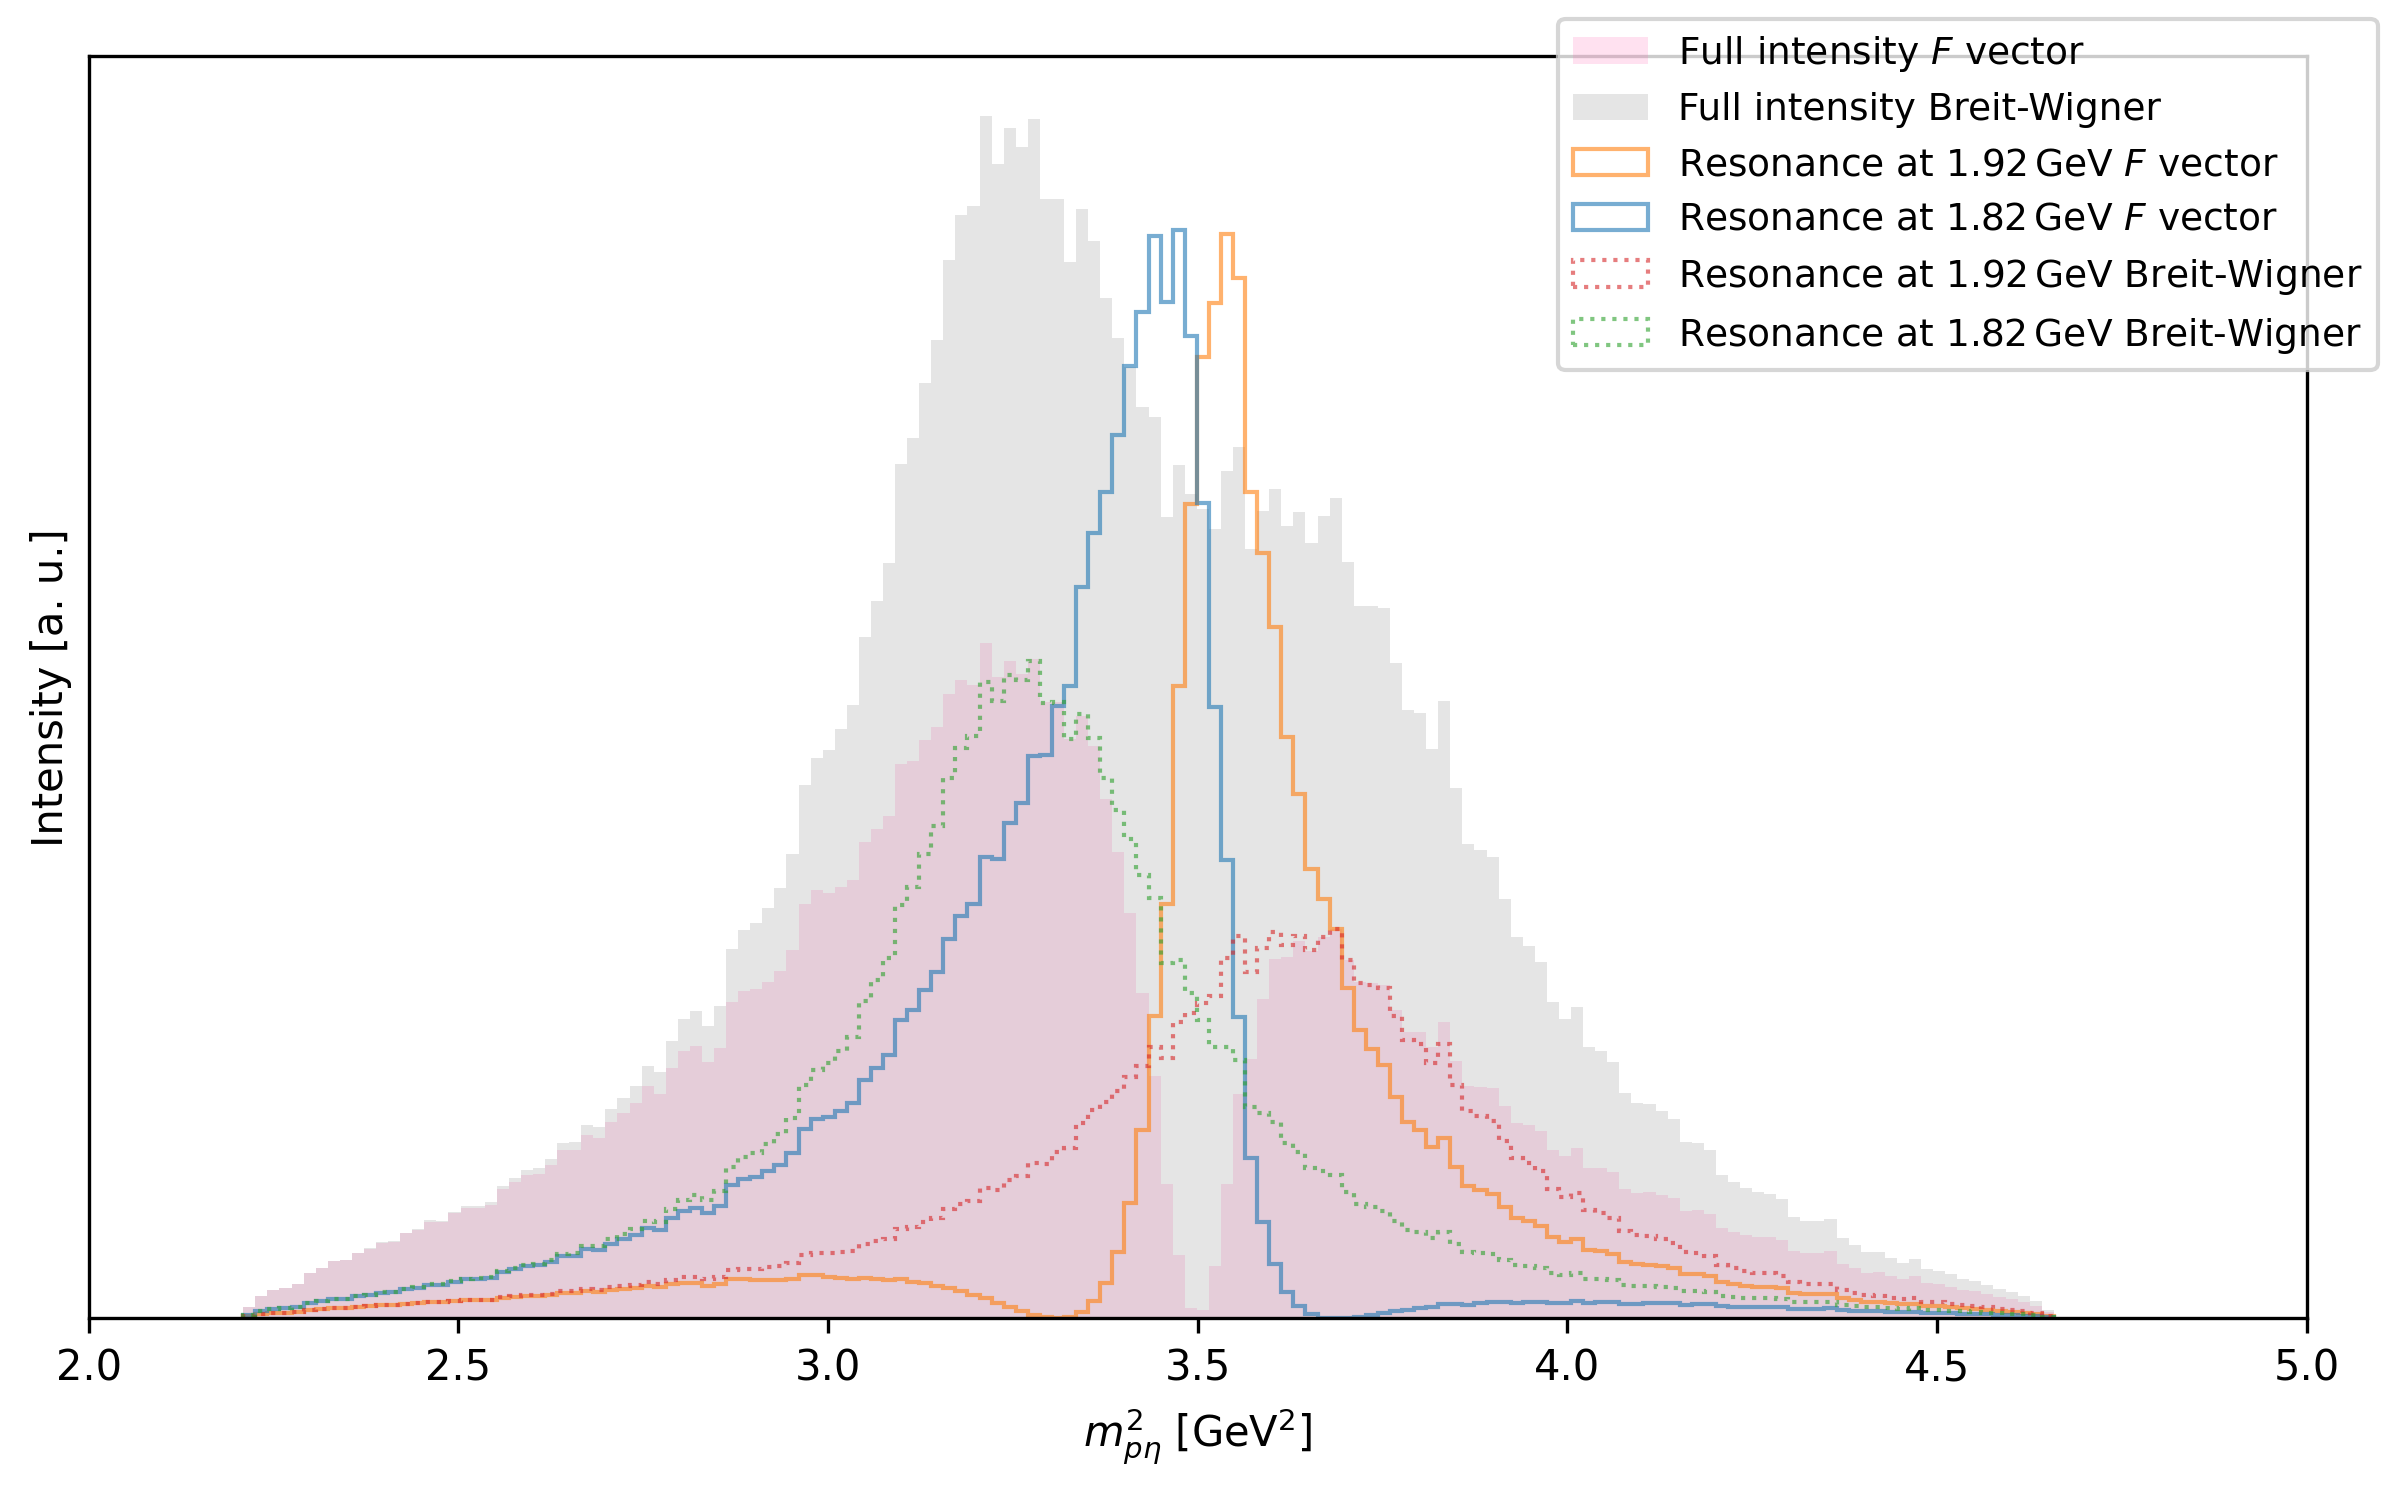

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
ax.set_xlim(2, 5)
ax.set_xlabel(R"$m_{p\eta}^{2}$ [GeV$^{2}$]")
ax.set_ylabel(R"Intensity [a. u.]")
ax.set_yticks([])

bins = 150
phsp_projection = np.real(phsp["m_01"]) ** 2
ax.hist(
    phsp_projection,
    weights=total_intensities,
    bins=bins,
    alpha=0.2,
    color="hotpink",
    label=R"Full intensity $F$ vector",
)

ax.hist(
    phsp_projection,
    weights=total_intensities_1,
    bins=bins,
    alpha=0.2,
    color="grey",
    label="Full intensity Breit-Wigner",
)
ax.hist(
    len(sub_intensities) * [phsp_projection],
    weights=list(sub_intensities.values()),
    bins=bins,
    alpha=0.6,
    label=[
        Rf"Resonance at ${p.mass}\,\mathrm{{GeV}}$ $F$ vector" for p in sub_intensities
    ],
    histtype="step",
)

ax.hist(
    len(sub_intensities_bw) * [phsp_projection],
    weights=list(sub_intensities_bw.values()),
    bins=bins,
    alpha=0.6,
    label=[
        Rf"Resonance at ${p.mass}\,\mathrm{{GeV}}$ Breit-Wigner"
        for p in sub_intensities
    ],
    histtype="step",
    ls="dotted",
)

fig.legend(fontsize="9")
plt.tight_layout()
plt.show()

## Plot Phase

In [35]:
epsilon = 1e-8
x = np.linspace(2, 5, num=400)
data = {"m_01": np.sqrt(x + epsilon * 1j)}

In [36]:
total_phase = np.angle(dynamics_func_fvector(data))
total_phase_1 = np.angle(dynamics_func_bw(data))
sub_phase = {
    p: np.angle(
        compute_sub_intensity(
            dynamics_func_fvector,
            data,
            resonances=[p.latex],
            coupling_pattern=r"\\beta",
        )
    )
    for p, _ in resonances
}
sub_phase_bw = {
    p: np.angle(
        compute_sub_intensity(
            dynamics_func_bw, data, resonances=[p.latex], coupling_pattern=r"Dummy_"
        )
    )
    for p, _ in resonances
}

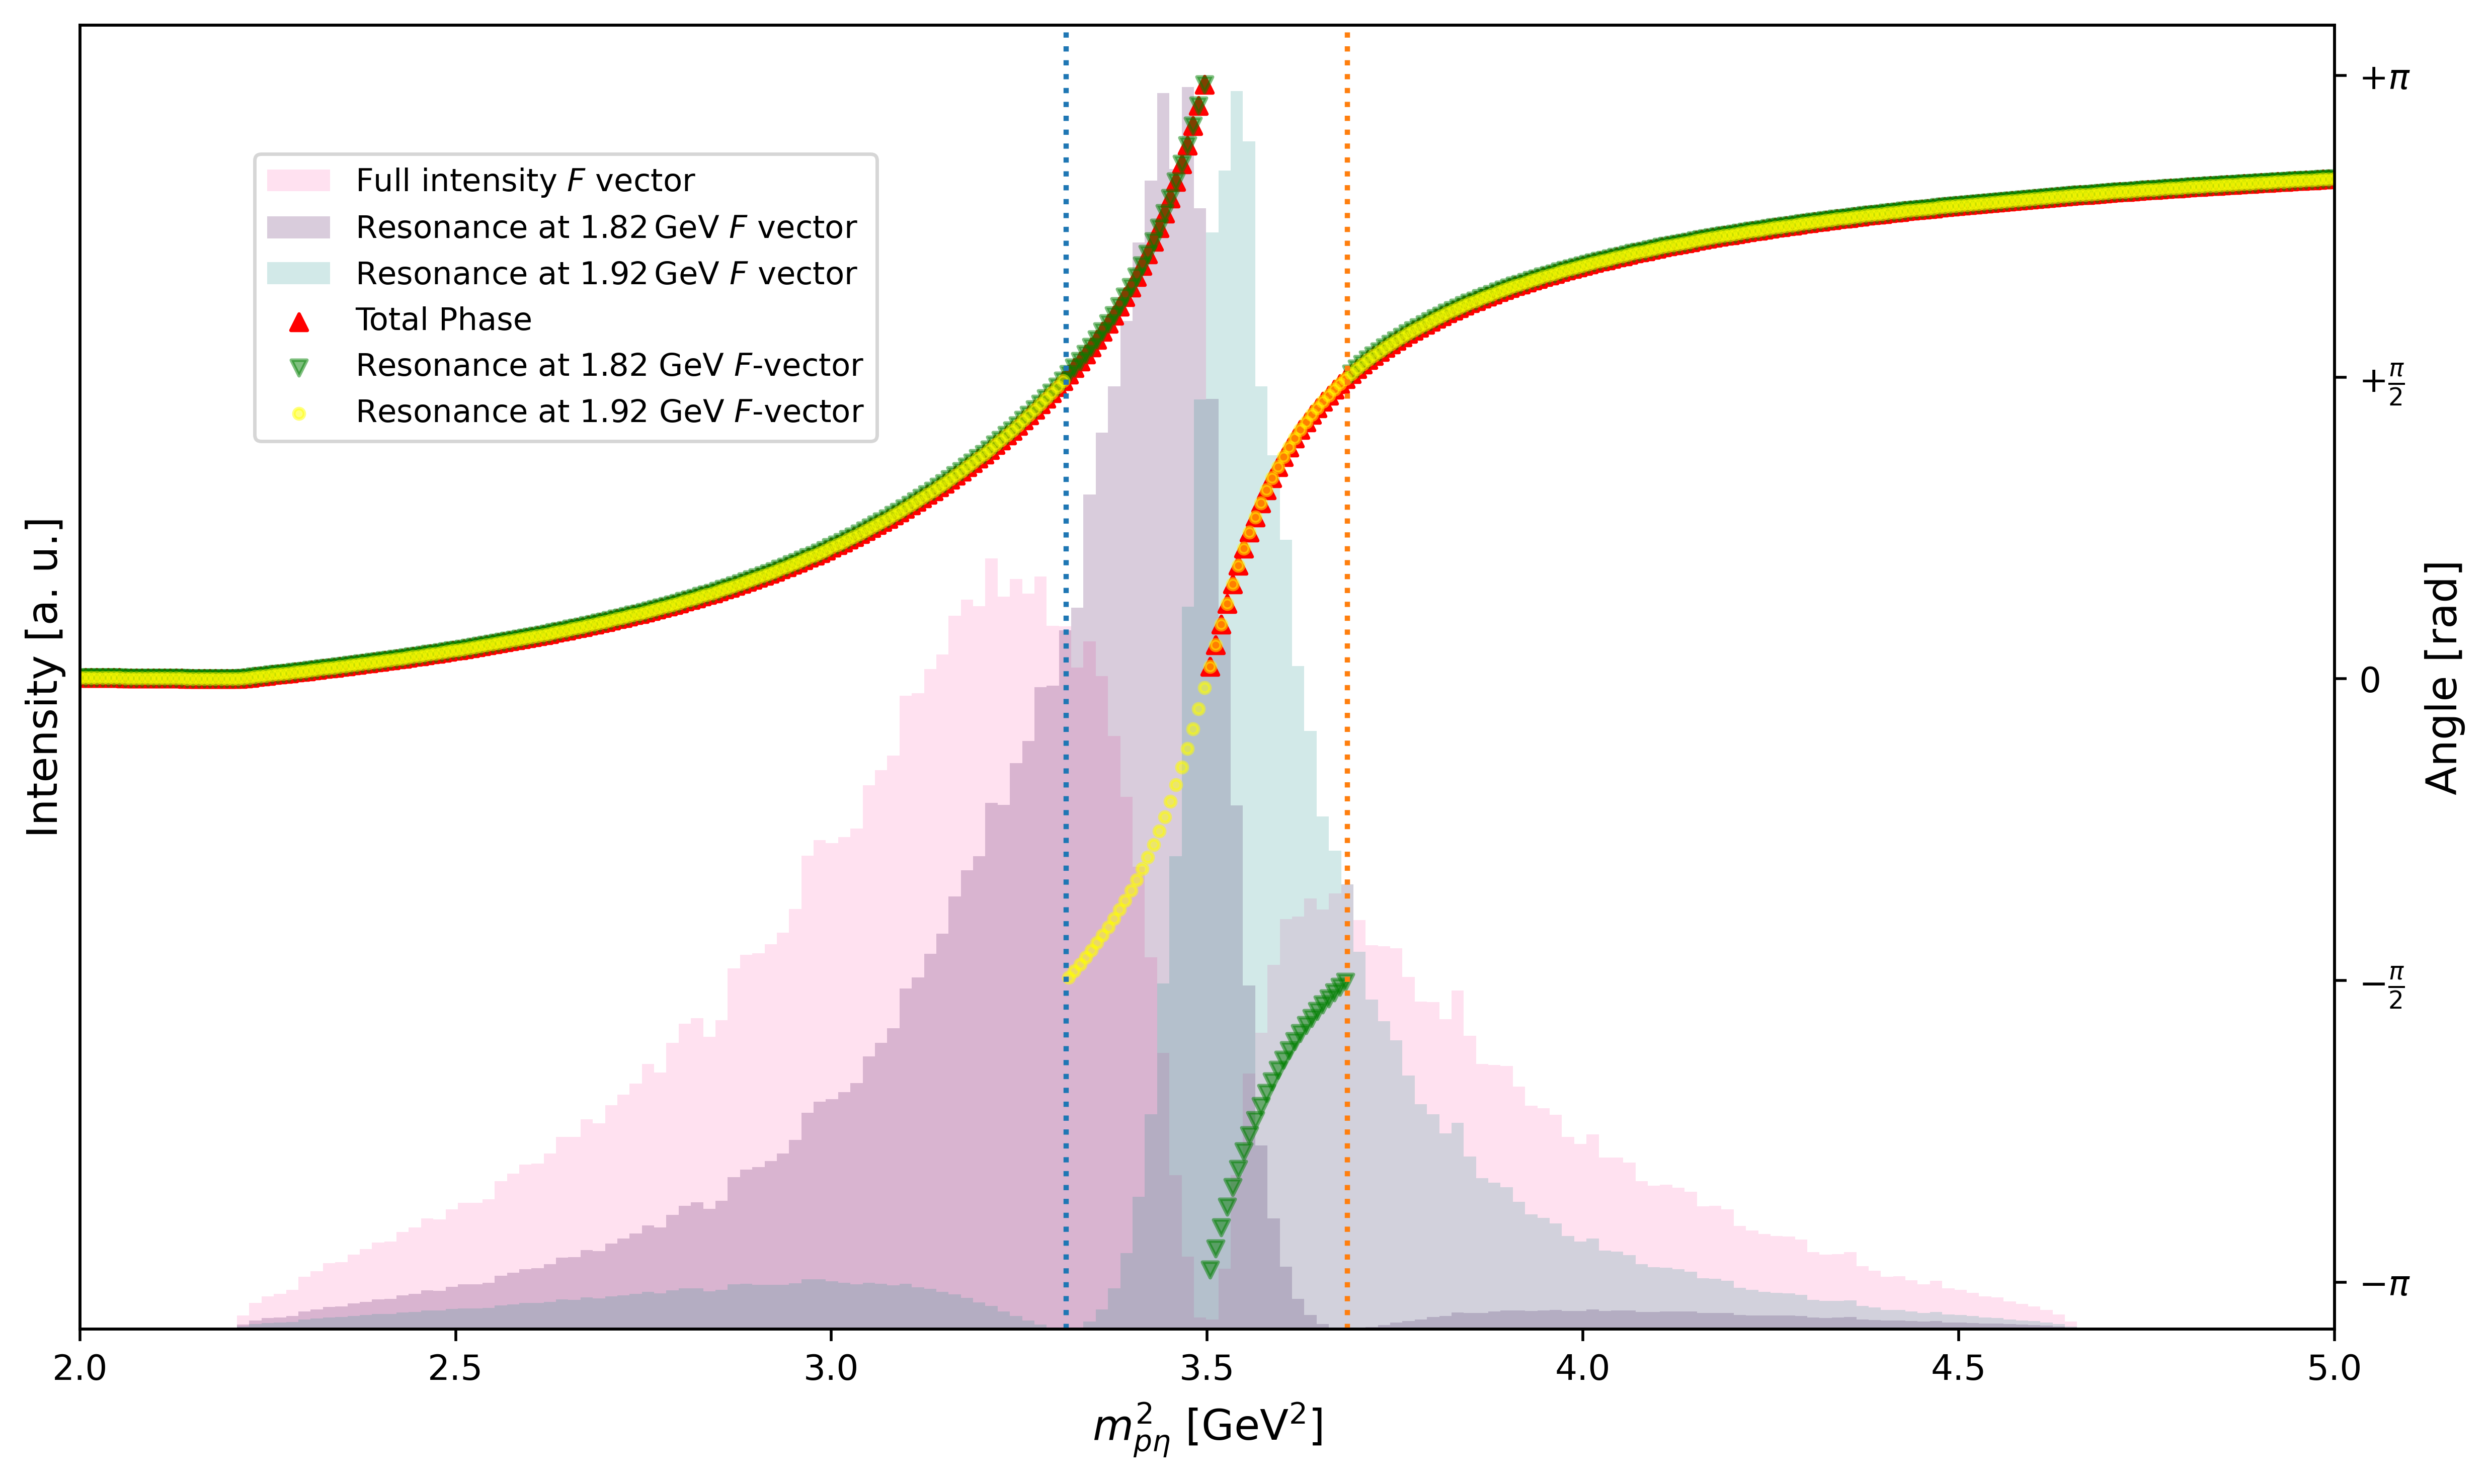

In [67]:

fig_phase, ax_phase = plt.subplots(figsize=(10, 6), dpi=500)
ax_phase.set_xlim(2, 5)
ax_phase.set_xlabel(R"$m_{p\eta}^{2}$ [GeV$^{2}$]", fontsize=12)
ax_phase.set_ylabel(R"Intensity [a. u.]", fontsize=12)
ax_phase.set_yticks([])

# Plot histogram
phsp_projection = np.real(phsp["m_01"]) ** 2
ax_phase.hist(
    phsp_projection,
    weights=total_intensities,
    bins=bins,
    alpha=0.2,
    color="hotpink",
    label="Full intensity $F$ vector",
)

for i, (k, v) in enumerate(sub_intensities.items()):
    ax_phase.hist(
        phsp_projection,
        weights=v,
        bins=bins,
        alpha=0.2,
        color=plt.cm.viridis(i / len(sub_intensities)),
        label=Rf"Resonance at ${k.mass}\,\mathrm{{GeV}}$ $F$ vector",
    )

ax_phase1 = ax_phase.twinx()
ax_phase1.set_ylabel(R"Angle [a. u.]", fontsize=12)
ax_phase1.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax_phase1.set_yticklabels([R"$-\pi$", R"$-\frac{\pi}{2}$", R"0", R"$+\frac{\pi}{2}$", R"$+\pi$"])

# Plot total phases
ax_phase1.scatter(x, total_phase, s=22, color="red", marker="^",label="Total Phase")

colors = ["green", "yellow"]
point_styles = ["v","o"]
marker_size = [20, 9]

for i, (k, v) in enumerate(sub_phase.items()):
    ax_phase1.scatter(
        x,
        v,
        color=colors[i % len(colors)],
        alpha=0.5,
        s=marker_size[i % len(marker_size)],
        marker=point_styles[i % len(point_styles)],
        label=f"Resonance at {k.mass} GeV $F$-vector",
    )
    ax_phase1.axvline(k.mass**2, linestyle="dotted", color=f"C{i}")

# Set labels for twin axes
ax_phase1.set_ylabel("Angle [rad]", fontsize=12)

# Add legends
fig_phase.legend(loc="upper left", fontsize="9", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

In [38]:
total_dynamics = dynamics_func_fvector(data)
sub_dynamics = {
    p:compute_sub_intensity(
            dynamics_func_fvector,
            data,
            resonances=[p.latex],
            coupling_pattern=r"\\beta",
        )
    
    for p, _ in resonances
}

sub_dynamics_bw = {
    p:compute_sub_intensity(
            dynamics_func_bw,
            data,
            resonances=[p.latex],
            coupling_pattern=r"Dummy_",
        )
    
    for p, _ in resonances
}

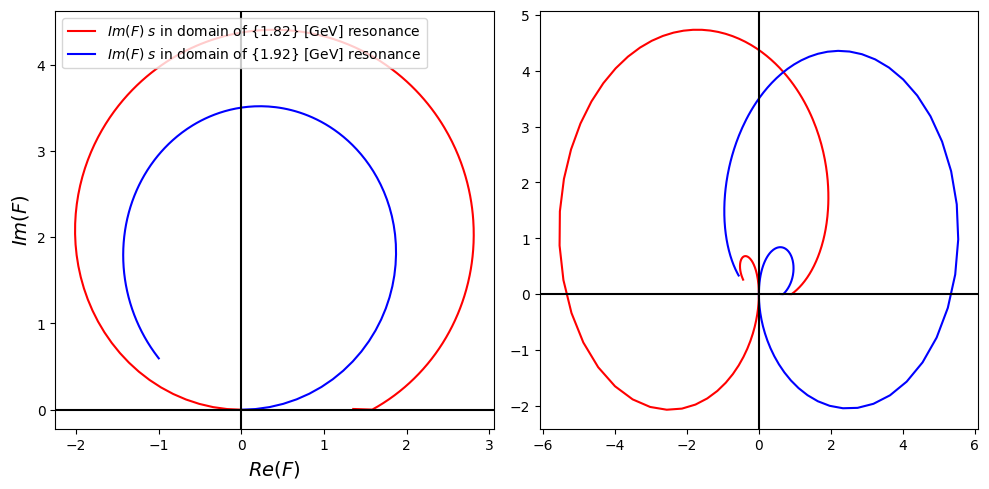

In [39]:
x_1 = np.linspace(2, (m_res1**2+m_res2**2)/2, num=500)
x_2 = np.linspace((m_res1**2+m_res2**2)/2,5, num=500)

#x_1 = np.linspace(2, 5, num=500)
#x_2 = np.linspace(2,5, num=500)

data_1 = {"m_01": np.sqrt(x_1 + epsilon * 1j)}
data_2 = {"m_01": np.sqrt(x_2 + epsilon * 1j)}

y_imag_1 = dynamics_func_fvector(data_1).imag
y_real_1 = dynamics_func_fvector(data_1).real
y_imag_2 = dynamics_func_fvector(data_2).imag
y_real_2 = dynamics_func_fvector(data_2).real
fig_A, axs = plt.subplots(1,2, figsize=(10, 5))
colorsA = ["red", "blue"]
axA,axA1 =axs
for i, (k, v) in enumerate(sub_dynamics.items()):
    axA1.plot(
        v.real,
        v.imag,
        color=colorsA[i % len(colorsA)],
        label=f"Resonance at {k.mass} GeV $F$-vector",
    )

axA.plot(y_real_1, y_imag_1, label=rf"$Im(F)$ $s$ in domain of {{{m_res1}}} [GeV] resonance ", color="red")
axA.plot(y_real_2, y_imag_2, label=rf"$Im(F)$ $s$ in domain of {{{m_res2}}} [GeV] resonance ", color="blue")
axA.set_xlabel(r"$Re(F)$", fontsize=14)
axA.set_ylabel(r"$Im(F)$", fontsize=14)
axA.axhline(0, color='black')
axA.axvline(0, color='black')
axA1.axhline(0, color='black')
axA1.axvline(0, color='black')
plt.tight_layout()
axA.legend(loc='upper left')
# Save the plot as PDF
#plt.savefig("_func_plots.pdf", dpi=750)
plt.show()

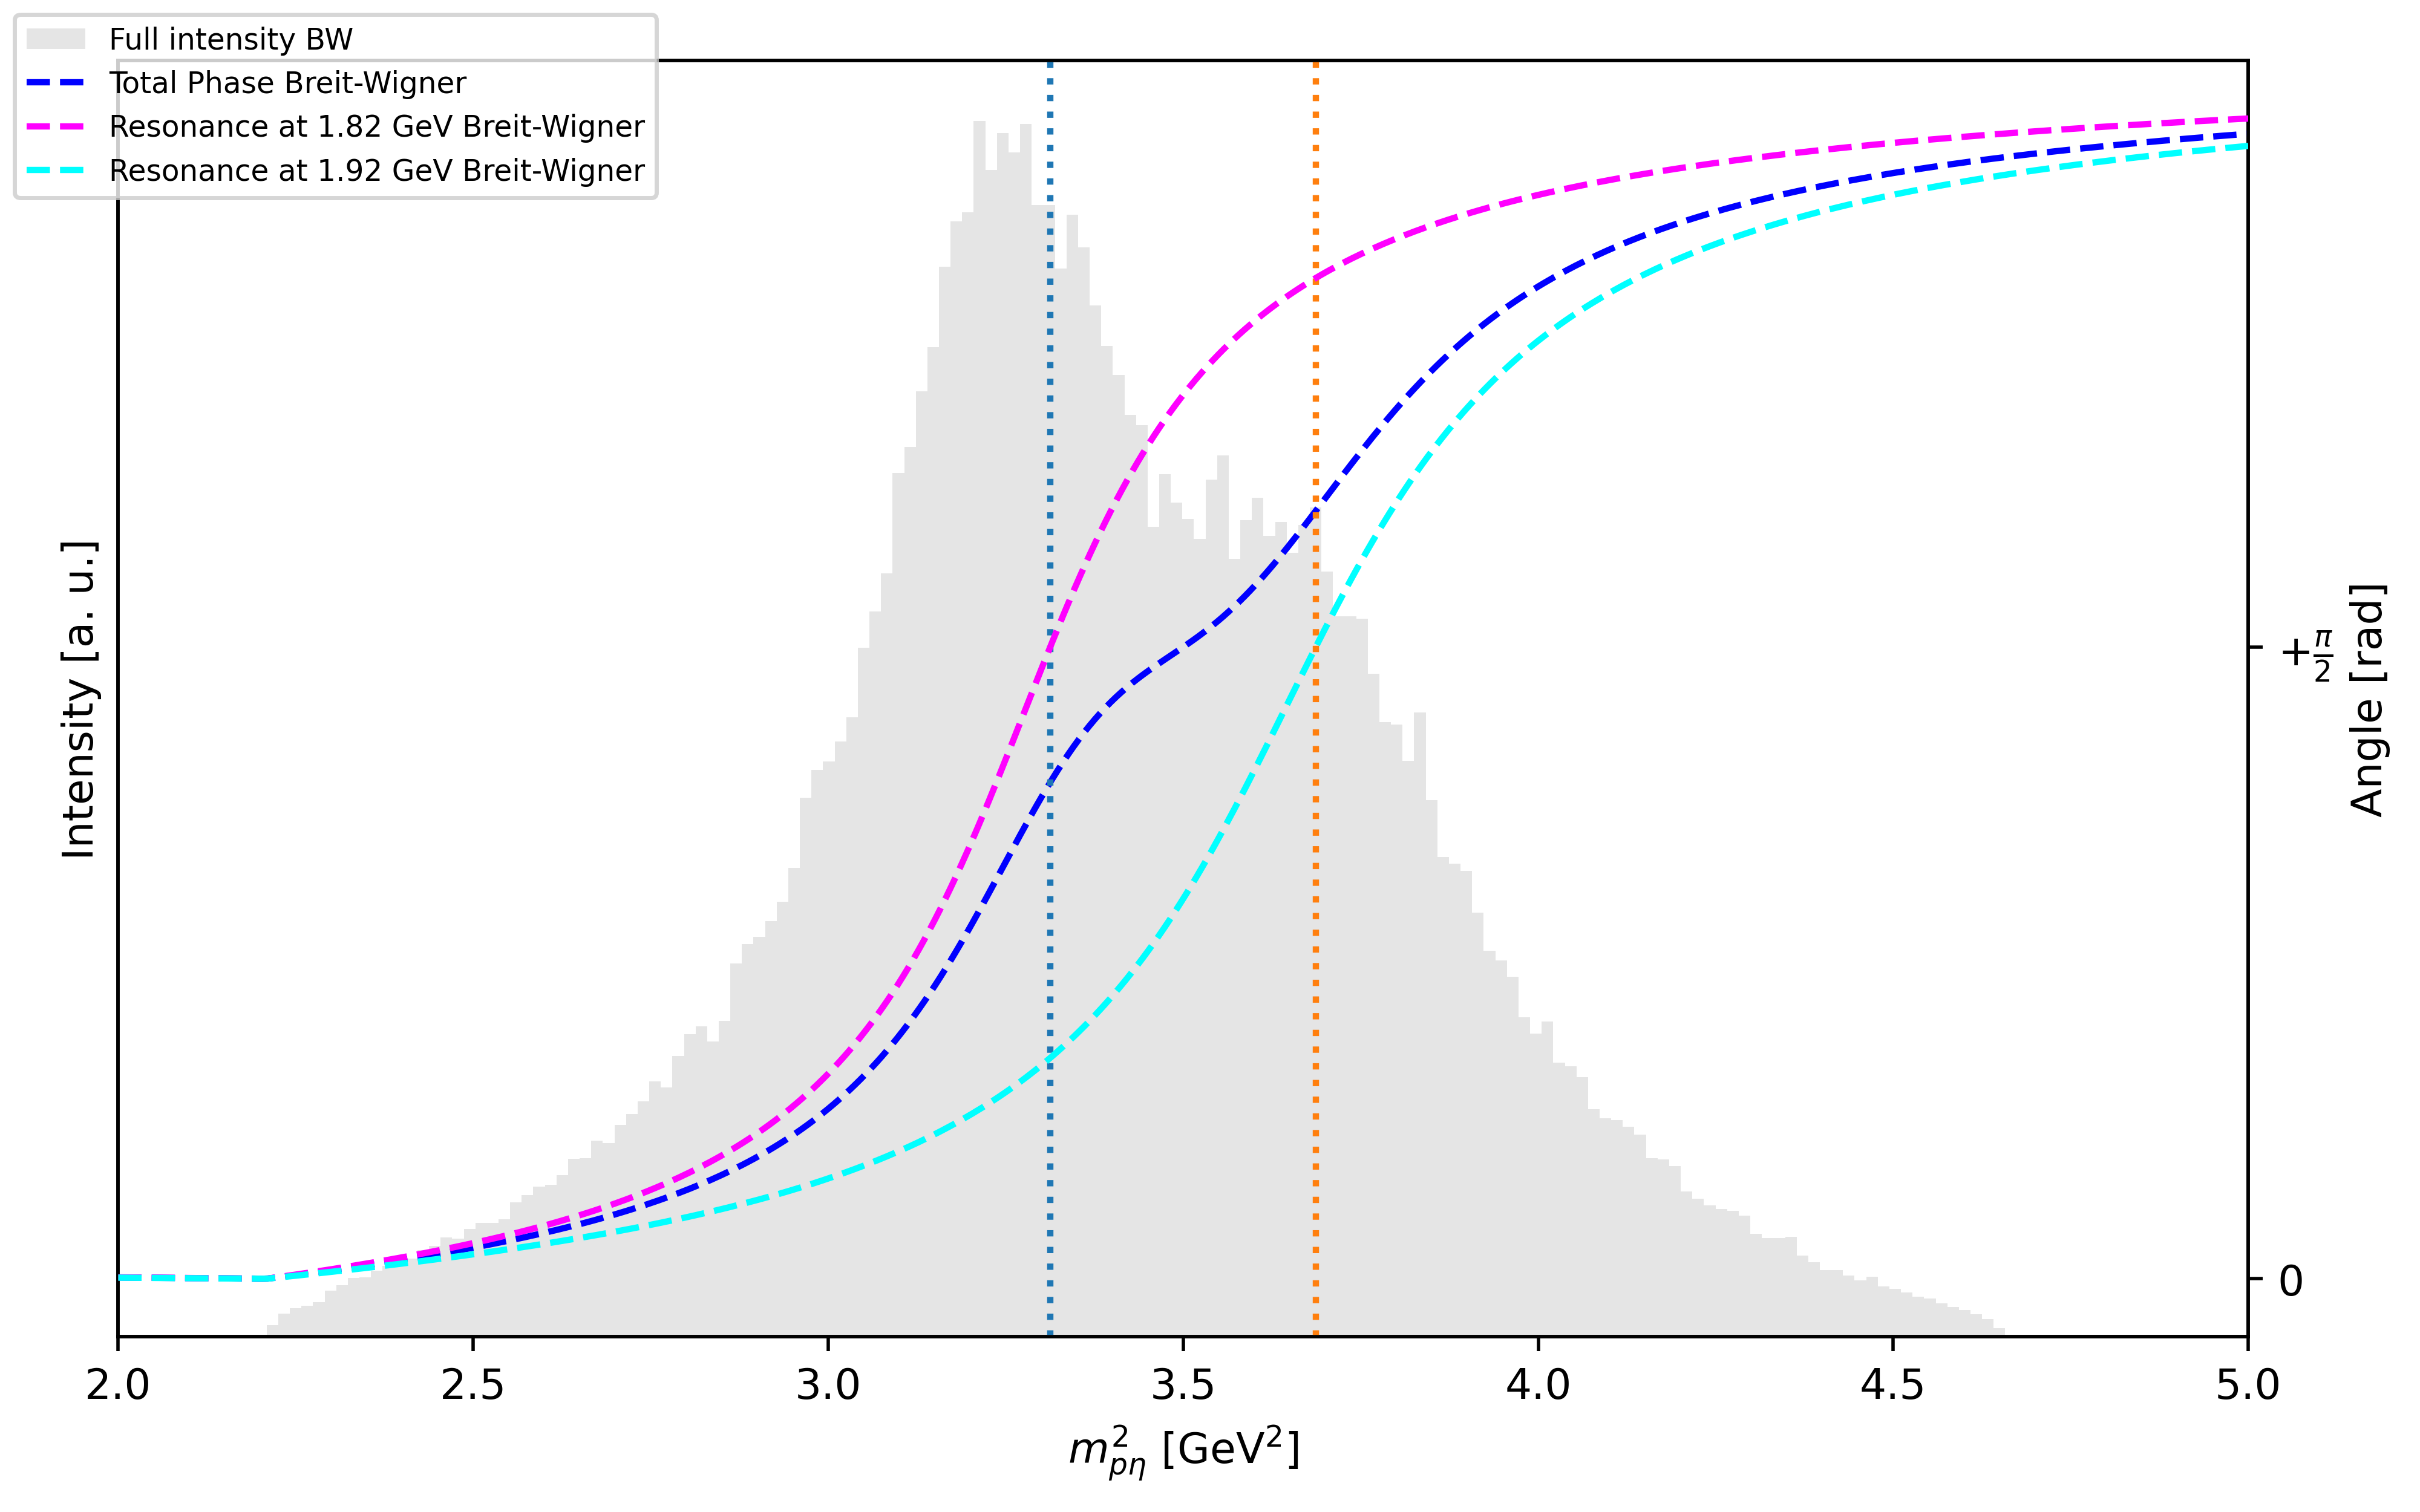

In [40]:
fig_phase_bw, ax_phase_bw = plt.subplots(figsize=(8, 5), dpi=500)
ax_phase_bw.set_xlim(2, 5)
ax_phase_bw.set_xlabel(R"$m_{p\eta}^{2}$ [GeV$^{2}$]")
ax_phase_bw.set_ylabel(R"Intensity [a. u.]")
ax_phase_bw.set_yticks([])

# Plot histogram
phsp_projection = np.real(phsp["m_01"]) ** 2
ax_phase_bw.hist(
    phsp_projection,
    weights=total_intensities_1,
    bins=bins,
    alpha=0.2,
    color="grey",
    label="Full intensity BW",
)


ax_phase1_bw= ax_phase_bw.twinx()
ax_phase1_bw.set_ylabel(R"Angle [a. u.]")
ax_phase1_bw.set_yticks([-np.pi,-np.pi/2,0,np.pi/2, +np.pi])
ax_phase1_bw.set_yticklabels([R"$-\pi$",R"$-\frac{\pi}{2}$",R"0",R"$+\frac{\pi}{2}$", R"$+\pi$"])
colors_bw = ["magenta", "cyan"]

# Plot total phases
ax_phase1_bw
ax_phase1_bw.plot(x, total_phase_1, color="blue", label="Total Phase Breit-Wigner",linestyle="--",)


for i, (k, v) in enumerate(sub_phase_bw.items()):
    ax_phase1_bw.plot(
        x,
        v,
        color=colors_bw[i % len(colors_bw)],zorder=999, linestyle="--",
        label=f"Resonance at {k.mass} GeV Breit-Wigner",
    )
    ax_phase1_bw.axvline(k.mass**2, linestyle="dotted", color=f"C{i}"),
# Set labels for twin axes
ax_phase1_bw.set_ylabel("Angle [rad]")

# Add legends
fig_phase_bw.legend(loc="upper left", fontsize="7")
plt.tight_layout()
plt.show()

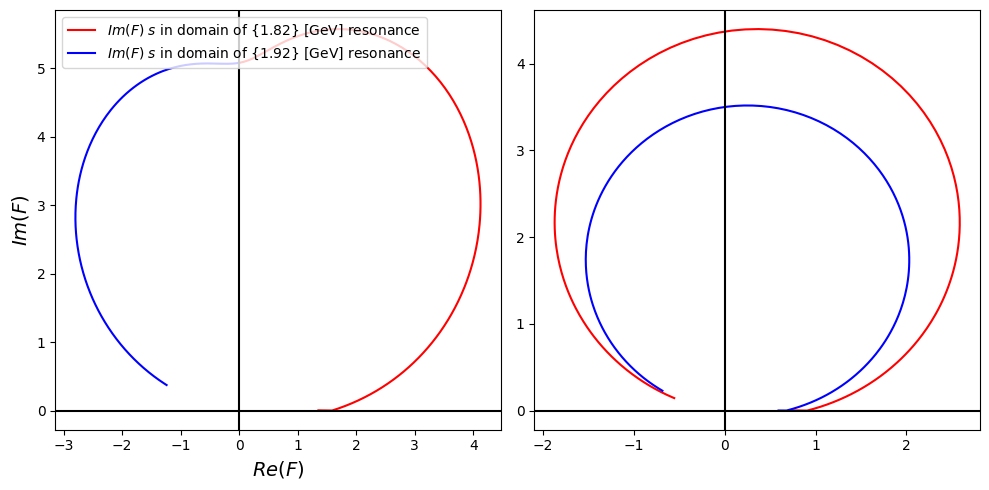

In [41]:

y_imag_1_bw = dynamics_func_bw(data_1).imag
y_real_1_bw = dynamics_func_bw(data_1).real
y_imag_2_bw = dynamics_func_bw(data_2).imag
y_real_2_bw = dynamics_func_bw(data_2).real
fig_A, axs = plt.subplots(1,2, figsize=(10, 5))
colorsA_bw = ["red", "blue"]
axA_bw,axA1_bw =axs
for i, (k, v) in enumerate(sub_dynamics_bw.items()):
    axA1_bw.plot(
        v.real,
        v.imag,
        color=colorsA_bw[i % len(colorsA_bw)],
        label=f"Resonance at {k.mass} GeV $F$-vector",
    )

axA_bw.plot(y_real_1_bw, y_imag_1_bw, label=rf"$Im(F)$ $s$ in domain of {{{m_res1}}} [GeV] resonance ", color="red")
axA_bw.plot(y_real_2_bw, y_imag_2_bw, label=rf"$Im(F)$ $s$ in domain of {{{m_res2}}} [GeV] resonance ", color="blue")
axA_bw.set_xlabel(r"$Re(F)$", fontsize=14)
axA_bw.set_ylabel(r"$Im(F)$", fontsize=14)
axA_bw.axhline(0, color='black')
axA_bw.axvline(0, color='black')
axA1_bw.axhline(0, color='black')
axA1_bw.axvline(0, color='black')
plt.tight_layout()
axA_bw.legend(loc='upper left')
# Save the plot as PDF
#plt.savefig("_func_plots.pdf", dpi=750)
plt.show()